# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

572

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Get OpenWeatherMap API Key and set query URL
api_key = weather_api_key

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create lists to hold various weather data
city_name = []
temps = []
lats = []
lngs = []
humid = []
cloudy = []
wind = []
country = []

# Create counter for city number
city_num = 1

# Print statement for beginning of loop/log
print(f'Starting Loop of Cities')
print(f'-----------------------------------')

# Create loop to go through cities in the city list (cities)
for city in cities:

    # Using try in event data in CityPy not available in OpenWeatherMap
    try:
        response = requests.get(f'{query_url}&q={city}').json()
        
        # Append weather data to empty lists
        city_name.append(response['name'])
        temps.append(response['main']['temp_max'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])

        print(f'Processing City {city_num}, {city}')
        
        # Add 1 to the city number as the loop progresses
        city_num = city_num + 1

        # Use timesleep (1 second pause) to not exceed API rate limit
        # Time sleep reference https://www.pythoncentral.io/pythons-time-sleep-pause-wait-sleep-stop-your-code/
        time.sleep(1)
    
    # If the city is not found
    except:
        print('City not available.')
    continue

Starting Loop of Cities
-----------------------------------
Processing City 1, bubaque
Processing City 2, ostrovnoy
City not available.
Processing City 3, ushuaia
Processing City 4, castro
Processing City 5, kapaa
Processing City 6, chokurdakh
City not available.
Processing City 7, novyy urengoy
Processing City 8, rikitea
Processing City 9, vaini
Processing City 10, ponta do sol
Processing City 11, albany
Processing City 12, marawi
Processing City 13, carnarvon
Processing City 14, bethel
Processing City 15, lakes entrance
Processing City 16, punta arenas
Processing City 17, chuy
Processing City 18, kaitangata
Processing City 19, edson
Processing City 20, port lincoln
Processing City 21, college
Processing City 22, lagoa
Processing City 23, tura
Processing City 24, port alfred
Processing City 25, kuala lipis
Processing City 26, sinnamary
Processing City 27, mecca
Processing City 28, puerto del rosario
Processing City 29, upernavik
Processing City 30, mount pleasant
Processing City 31, t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Put lists of weather data into dictionary for converting to Data Frame
weather_dict = {
    "City": city_name,
    "Country": country,
    "High Temp (F)": temps,
    "Cloudiness (%)": cloudy,
    "Humidity (%)": humid,
    "Wind (mph)": wind,
    "Latitude": lats,
    "Longitude": lngs
}

# Create DataFrame from dictionary
weather_df = pd.DataFrame(weather_dict)
# weather_df.count() - there are 530 cities in the dataset

# Print DataFrame to csv
weather_df.to_csv('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/cities.csv')

# Display DataFrame
weather_df.head()

,City,Country,High Temp (F),Cloudiness (%),Humidity (%),Wind (mph),Latitude,Longitude
0,Bubaque,GW,78.64,3,68,21.16,11.2833,-15.8333
1,Ostrovnoy,RU,36.54,100,99,1.66,68.0531,39.5131
2,Ushuaia,AR,55.40,40,58,16.11,-54.8000,-68.3000
3,Castro,BR,74.52,18,48,5.19,-24.7911,-50.0119
4,Kapaa,US,73.40,75,73,17.27,22.0752,-159.3190


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
# Get max value of humidity to test for cities with humidity > 100%

humid_max = weather_df['Humidity (%)'].max()
print(humid_max)
# there are no cities with humidity > 100%

100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

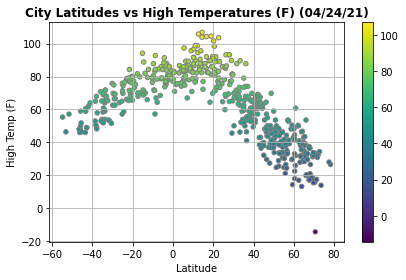

In [23]:
# Build scatter plot for Latitudes vs. Temperatures

# set x and y values, set value for colormap
# colormap reference https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
x = weather_df['Latitude']
y = weather_df['High Temp (F)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='viridis', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs High Temperatures (F) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('High Temp (F)')
plt.grid(True)
plt.colorbar()

# save to image file - saving as a .jpg so I don't have to deal with the whitespace issue (.png files will save with transparent bg)
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/Temp_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

This code is analyzing temperature against a city's latitude on a given day (Saturday, April 24, 2021). The plot indicates that the closer a city is to the equator (0), the warmer its temperature.

## Latitude vs. Humidity Plot

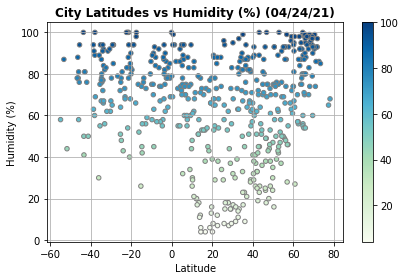

In [24]:
# Build scatter plot for Latitudes vs. Humidity

# set x and y values, set value for colormap
x = weather_df['Latitude']
y = weather_df['Humidity (%)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='GnBu', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs Humidity (%) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/Humid_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

This code is analyzing humidity levels against a city's latitude on a given day (Saturday, April 24, 2021). While there is some clustering at 0-60 degrees latitude and 0-40% humidity, the plot does not indicate a strong correlation between a city's latitude and its humidity level (%).

## Latitude vs. Cloudiness Plot

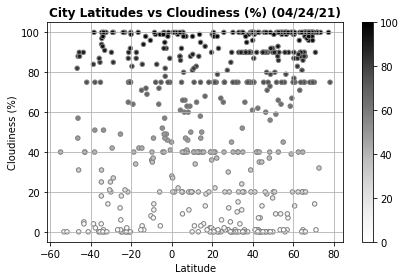

In [25]:
# Build scatter plot for Latitudes vs. Cloudiness

# set x and y values, set value for colormap
x = weather_df['Latitude']
y = weather_df['Cloudiness (%)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='Greys', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs Cloudiness (%) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/Cloud_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

This code is analyzing cloudiness against a city's latitude on a given day (Saturday, April 24, 2021). The plot does not indicate a correlation between a city's latitude and its cloudiness.

## Latitude vs. Wind Speed Plot

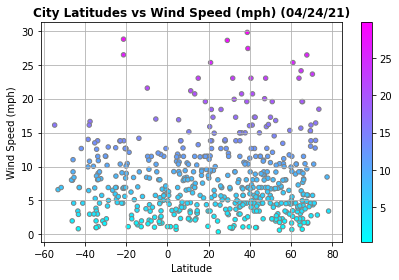

In [26]:
# Build scatter plot for Latitudes vs. Wind Speed

# set x and y values, set value for colormap
x = weather_df['Latitude']
y = weather_df['Wind (mph)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='cool', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs Wind Speed (mph) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/Wind_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

This code is analyzing wind speed (mph) against a city's latitude on a given day (Saturday, April 24, 2021). While there is some small clustering at 20-65 degrees latitude and 20-30 mph wind speed, the plot does not indicate a strong correlation between a city's latitude and its wind speed.

## Linear Regression

In [27]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
northern_df = weather_df.loc[(weather_df['Latitude']>=0)]
southern_df = weather_df.loc[(weather_df['Latitude']<0)]

# --> NOTE: I attempted to build a function to run all regression plots (see code below) - while the plots would produce, they did not save as figures correctly, and I could not figure out how to plot the chart title, so I went back to coding the Linear Regression plots individually.

# def regress_plots(x_values, y_values, data_point, label_loc):
    
#     # add regression line and equation to plot
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#     # define the plot
#     plt.scatter(x_values, y_values)
#     plt.plot(x_values, regress_values, 'r-')
#     plt.annotate(line_eq, label_loc, fontsize=15, color='red')
#     plt.xlabel('Latitude')
#     plt.ylabel(data_point)
#     print(f'The r-value is: {rvalue**2}')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# EXAMPLE PLOT WITH ABOVE FUNCTION

# x_values = northern_df['Latitude']
# y_values = northern_df['High Temp (F)']
# regress_plots(x_values, y_values, 'High Temp (F)', (5,10))
# plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Temp_v_Lat.jpg')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.78.


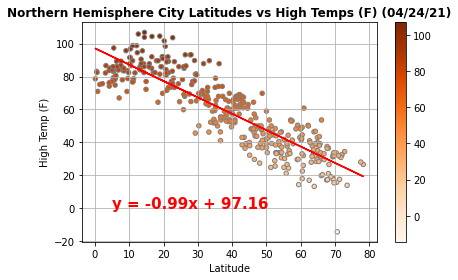

In [30]:
# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = northern_df['Latitude']
y_values = northern_df['High Temp (F)']
t = y_values

# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Oranges', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (5,0), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Northern Hemisphere City Latitudes vs High Temps (F) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('High Temp (F)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/North_Temp_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.64.


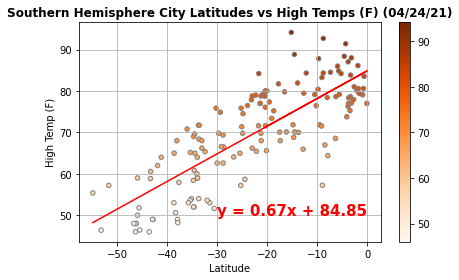

In [31]:
# Build scatter plot for Southern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = southern_df['Latitude']
y_values = southern_df['High Temp (F)']
t = y_values

# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Oranges', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (-30,50), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Southern Hemisphere City Latitudes vs High Temps (F) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('High Temp (F)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/South_Temp_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

The Northern and Southern Hemisphere plots above indicate a correlation between a city's latitude and its temperature. The Northern Hemisphere plot shows a negative correlation line; as the latitude increases (the further from the equator a city is), the temperature decreases. The Southern Hemisphere plot shows a positive correlation line; as the latitude increases (the closer to the equator a city is) the temperature increases. The Northern Hemisphere plot indicates a stronger correlation (demostrated by the r-value) between latitude and temperature than the Southern Hemisphere. Overall, the closer to the equator a city's latitude (on Saturday, April 24, 2021), the warmer the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.07.


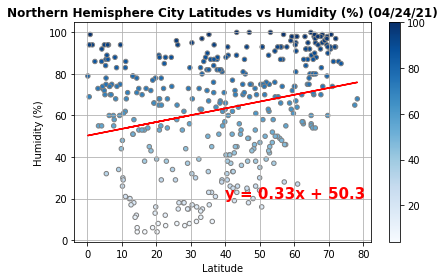

In [39]:
# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = northern_df['Latitude']
y_values = northern_df['Humidity (%)']
t = y_values

# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Blues', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (40,20), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Northern Hemisphere City Latitudes vs Humidity (%) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/North_Humid_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.0.


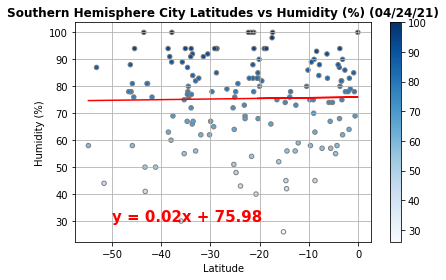

In [38]:
# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = southern_df['Latitude']
y_values = southern_df['Humidity (%)']
t = y_values

# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Blues', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (-50,30), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Southern Hemisphere City Latitudes vs Humidity (%) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/South_Humid_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

The Northern and Southern Hemisphere plots above do not indicate a correlation between a city's latitude and its humidity. While there is a slight positive correlation on the Northern Hemisphere plot, the r-value indicates there is little to no linear relationship between the data points.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.07.


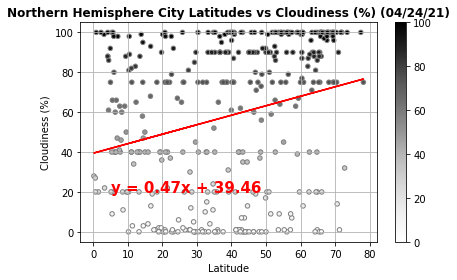

In [34]:
# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness (%)']
t = y_values

# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Greys', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (5,20), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Northern Hemisphere City Latitudes vs Cloudiness (%) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/North_Clouds_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.03.


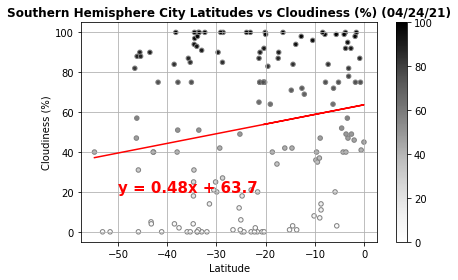

In [35]:
# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness (%)']
t = y_values

# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Greys', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (-50,20), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Southern Hemisphere City Latitudes vs Cloudiness (%) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/South_Clouds_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

The Northern and Southern Hemisphere plots above do not indicate a correlation between a city's latitude and its cloudiness. While there are slight positive correlations on both the Northern and Southern Hemisphere plots, the r-values indicate there is little to no linear relationship between the data points.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0.


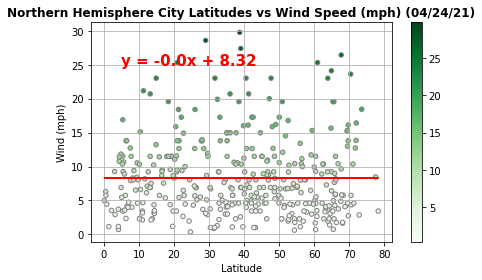

In [37]:
# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = northern_df['Latitude']
y_values = northern_df['Wind (mph)']
t = y_values

# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Greens', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (5,25), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Northern Hemisphere City Latitudes vs Wind Speed (mph) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind (mph)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/North_Wind_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.01.


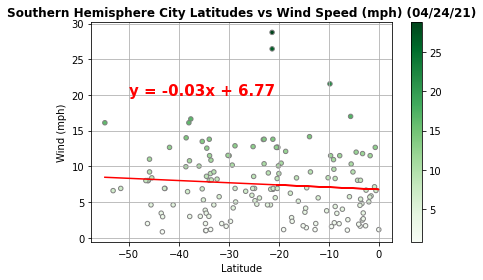

In [42]:
# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = southern_df['Latitude']
y_values = southern_df['Wind (mph)']
t = y_values

# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Greens', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (-50,20), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Southern Hemisphere City Latitudes vs Wind Speed (mph) (04/24/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind (mph)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/Images/South_Wind_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

The Northern and Southern Hemisphere plots above do not indicate a correlation between a city's latitude and its windiness. The r-values indicate there is no linear relationship between the data points on both plots.